## Sara Aldubaie ##

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# original link: https://archive.ics.uci.edu/ml/datasets/Adult

PATH_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Save column names as a list
col_ls = ["age", "workclass","fnlwgt","education","education-num","marital-status", "occupation", "relationship","race","sex", "capital-gain", "capital-loss","hours-per-week","native-country","label"]

# Pass in col_ls into names parameter to explicitly name each column
df = pd.read_csv(PATH_URL, names=col_ls)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# filtering the data (only considring people with education higher than high 12-grade )

df2 = df.loc[ (df['education'].str.contains("Bachelors")) | 
       (df['education'].str.contains("Some-college"))|
       (df['education'].str.contains("Masters")) |
       (df['education'].str.contains("Assoc-voc")) |
       (df['education'].str.contains("Doctorate"))]

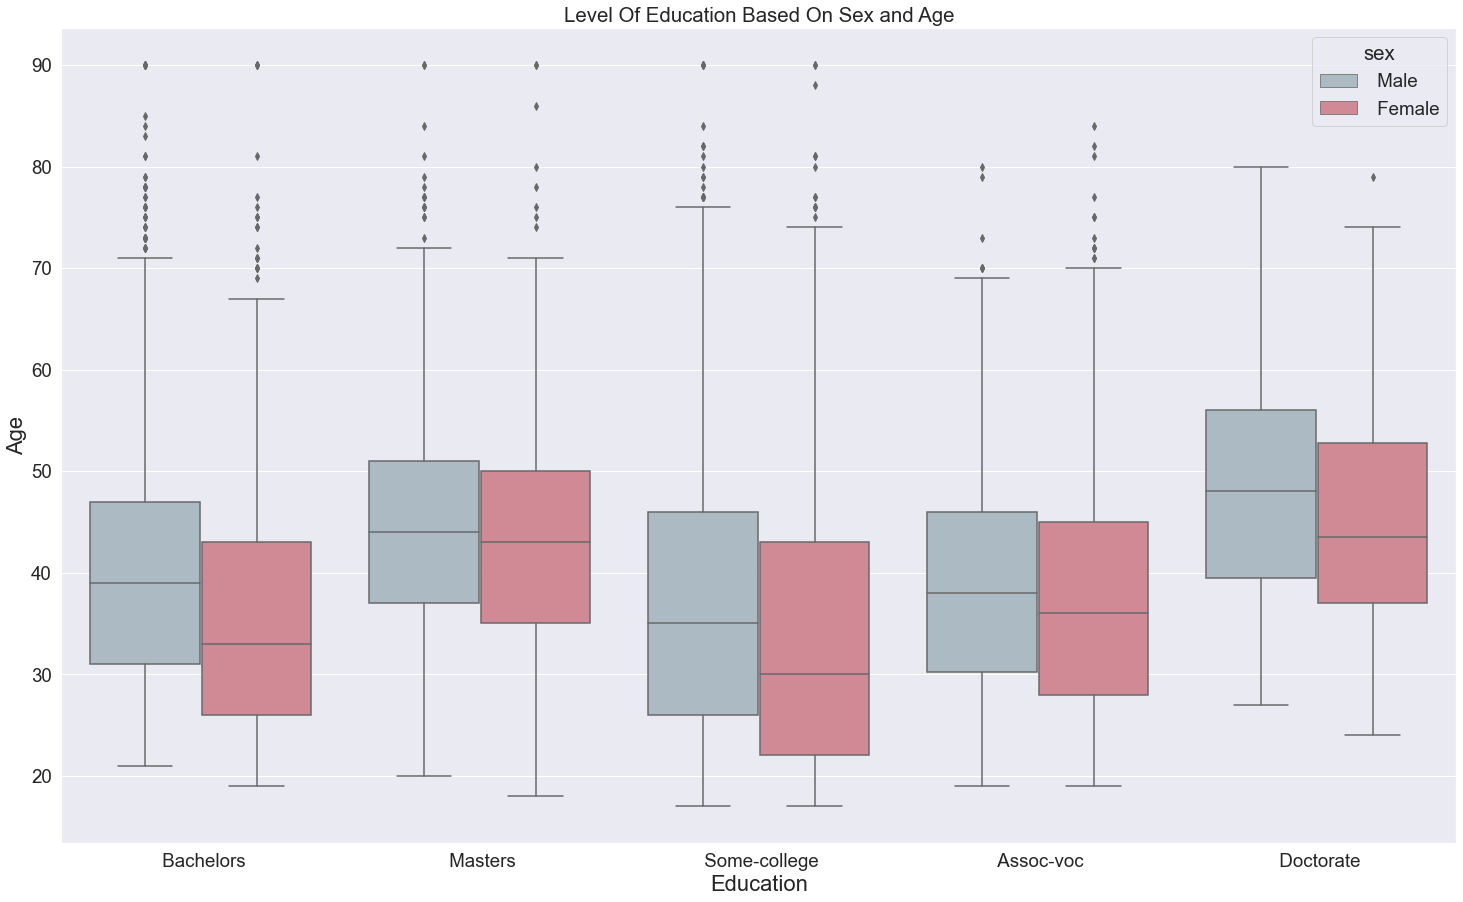

In [4]:
plt.figure(figsize=(25,15)) # figure size 
sns.set_theme(style="darkgrid") # set a theme 
sns.set(font_scale = 1.70) # font size 
palette = ['#a7bbc7','#da7f8f', '#f5e6ca', '#a0937d', '#fbc6a4', '#4ca1a3', '#ff7b54']
sns.set_palette(palette)  # set color palette
# plot code 
sns.boxplot(
    x="education", 
    y="age",
    hue="sex",
    data=df2
)
# Naming labels and title 
plt.ylabel('Age', fontsize=22)
plt.xlabel('Education', fontsize=22)
plt.title("Level Of Education Based On Sex and Age");



### Based on the above plot we can understand the following: ###

- People with doctorate grade start working older age comparing with the rest of the grades 
  meaning they usually take more time in studying than the other grades 
- Mostly on average females start working at a younger age than males
- There is a lot of outliers above the age of 70 
- People with some college start working at a younger age than others meaning they usually take less time in studying than the other grades  


<Figure size 432x288 with 0 Axes>

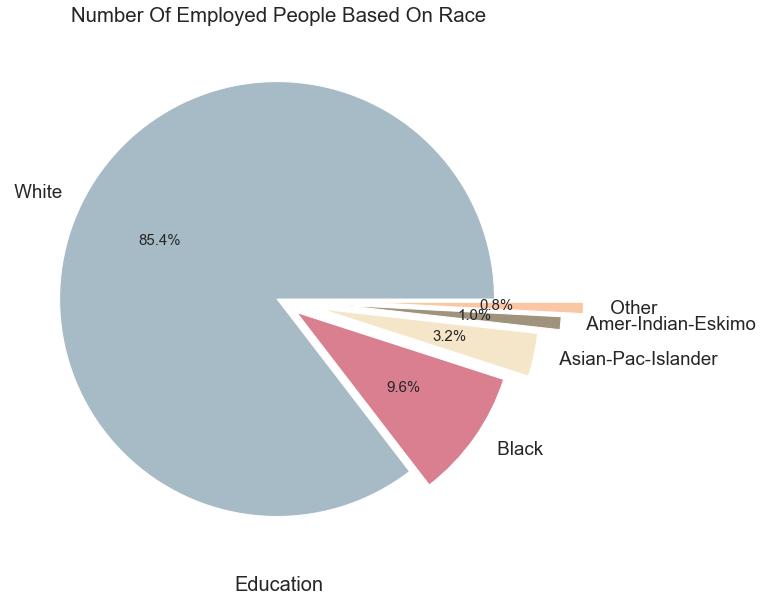

In [5]:
plt.clf() # clear plot data 
# Create a pie chart fro
series = df["race"].value_counts() # data we need 
labels = series.index # to set labels 
values = series.values # to set a values 
# to make space between chart elemnts  
explode = (0.01,0.1,0.2,0.3,0.4)
plt.figure(figsize=(10,10)) # size of the figure
plt.rcParams['font.size'] = 15 # font size 
# Plot the data
plt.pie(values, labels = labels, autopct = '%1.1f%%', explode = explode) # plot pink scatter plot
plt.xlabel('Education', fontsize=20) # add label and change font size 
plt.title("Number Of Employed People Based On Race") # add title and change color to green
plt.show() # show results

### Based on the above plot we can understand the following: ###

- The majority of people working in the US are from the white race

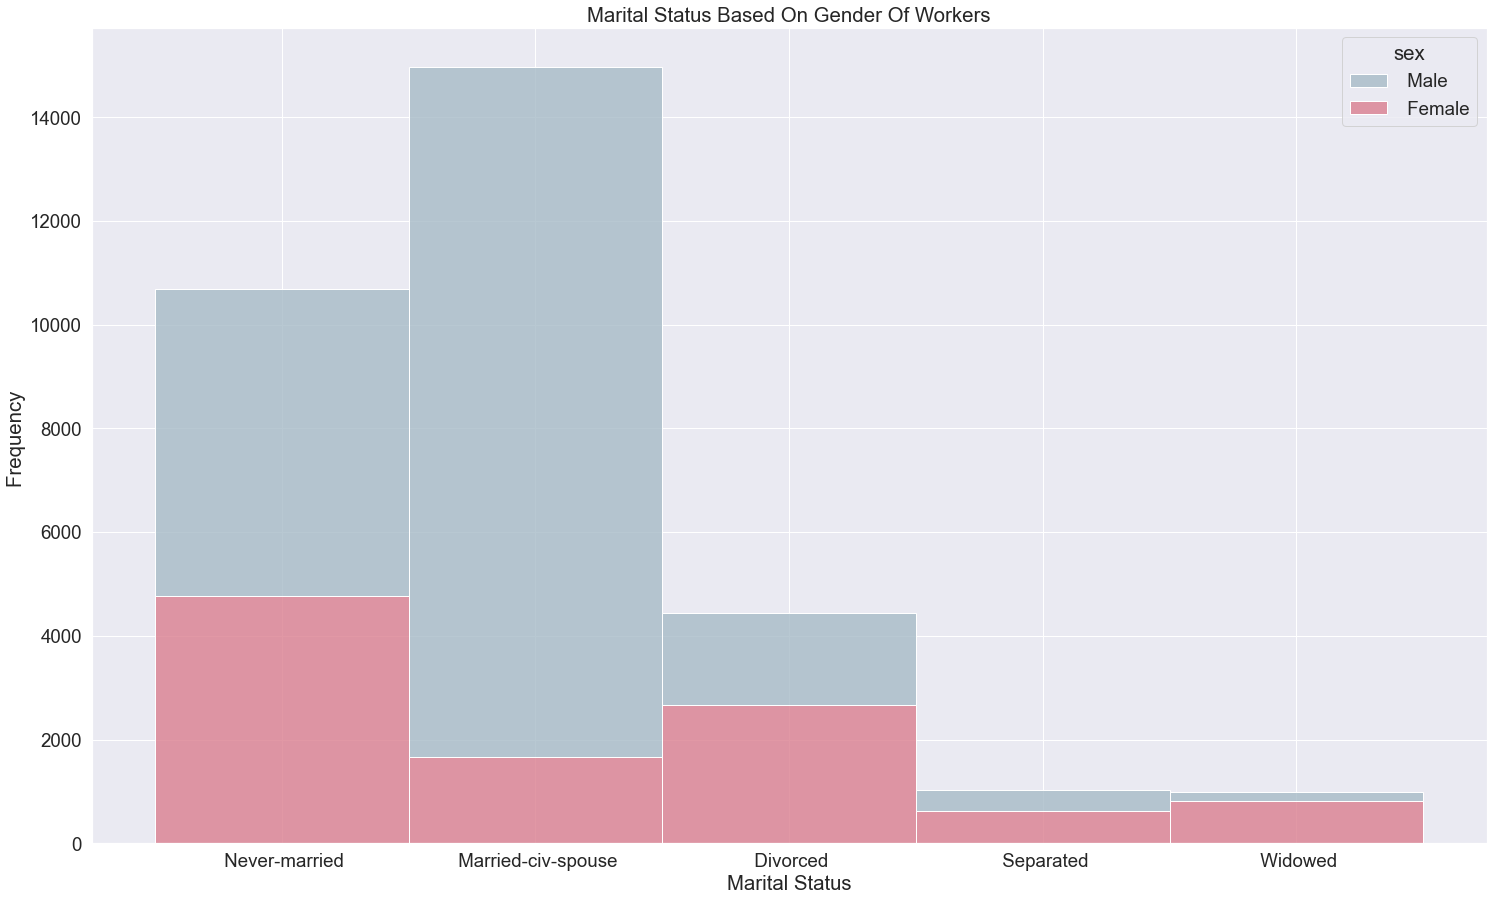

In [6]:
# filtering the data
df3 = df.loc[ (df['marital-status'].str.contains("Never-married")) | 
       (df['marital-status'].str.contains("Married-civ-spouse"))|
       (df['marital-status'].str.contains("Divorced")) |
       (df['marital-status'].str.contains("Separated")) |
       (df['marital-status'].str.contains("Widowed"))]

# plot code 
plt.figure(figsize=(25,15)) # figure size 
sns.histplot(
    df3,
    x="marital-status",
    hue="sex",
    multiple="stack",
    alpha=.8
)
# Naming labels and title 
plt.title("Marital Status Based On Gender Of Workers")
plt.xlabel('Marital Status')
plt.ylabel('Frequency ');

### Based on the above plot we can understand the following: ###

- The number of males workers is higher than females in all marital status
- The highest number of worker are people that are married and then non married people  

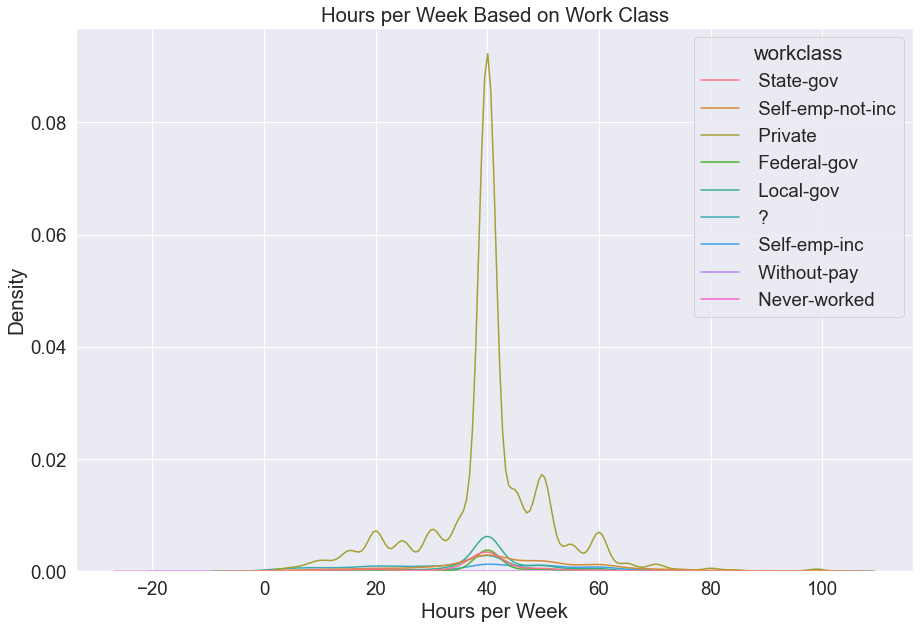

In [7]:
plt.figure(figsize=(15,10)) # figure size 
sns.kdeplot(
    data=df, 
    x="hours-per-week",
    hue="workclass"
)
# Naming labels and title 
plt.title("Hours per Week Based on Work Class")
plt.xlabel('Hours per Week');


### Based on the above plot we can understand the following: ###

- The majority of workers are working 40 hours per week 
- Most of the worker belongs to private work class
